In [100]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import warnings

In [24]:
iris=load_iris(as_frame=True)
df=iris['data']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df.shape

(150, 5)

In [31]:
df=shuffle(df,random_state=42)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
101,5.8,2.7,5.1,1.9,2
55,5.7,2.8,4.5,1.3,1
79,5.7,2.6,3.5,1.0,1
5,5.4,3.9,1.7,0.4,0
148,6.2,3.4,5.4,2.3,2


C:\Users\adity\AppData\Local\Temp\ipykernel_45428\3350912700.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['petal length (cm)'],df['petal width (cm)'],cmap='plasma')


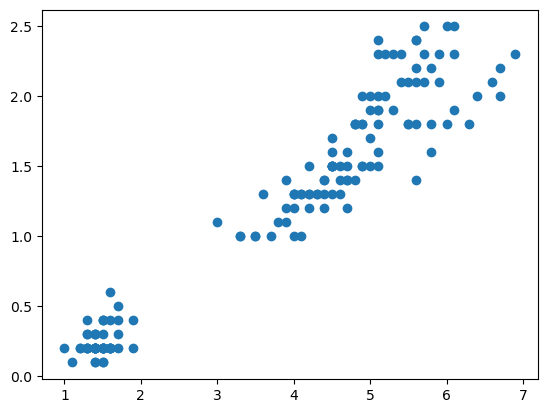

In [40]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],cmap='plasma')
plt.show()

## KMeans Clustering

In [42]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

C:\Users\adity\OneDrive - IIT Delhi\Anaconda installation\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\OneDrive - IIT Delhi\Anaconda installation\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [70]:
df['preds']=y_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,preds,pred_scaled
101,5.8,2.7,0.762758,0.922303,2,0,1
55,5.7,2.8,0.421734,0.132510,1,2,2
79,5.7,2.6,-0.146641,-0.262387,1,2,2
5,5.4,3.9,-1.169714,-1.052180,0,1,0
148,6.2,3.4,0.933271,1.448832,2,0,1


In [71]:
km.cluster_centers_

array([[-1.30498732, -1.25489349],
       [ 1.02799959,  1.12797813],
       [ 0.3058728 ,  0.16541778]])

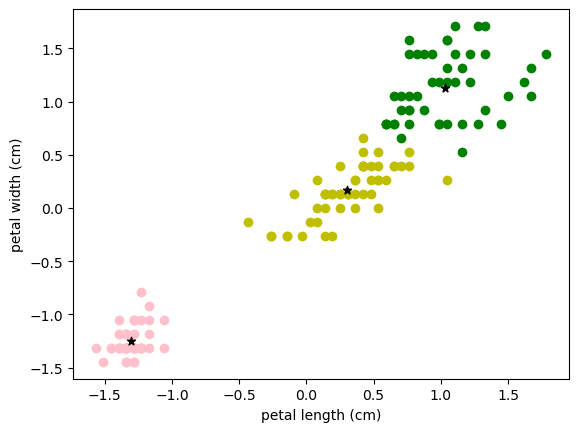

In [85]:
df0=df[df.preds==0]
df1=df[df.preds==1]
df2=df[df.preds==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='pink')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='y')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

## KMeans Clustering with scaling

In [88]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[['petal length (cm)','petal width (cm)']]=scaler.fit_transform(df[['petal length (cm)','petal width (cm)']])

In [101]:
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

km = KMeans(n_clusters=3, n_init=10)
y_pred_scaled=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [90]:
km.cluster_centers_

array([[ 1.02799959,  1.12797813],
       [-1.30498732, -1.25489349],
       [ 0.3058728 ,  0.16541778]])

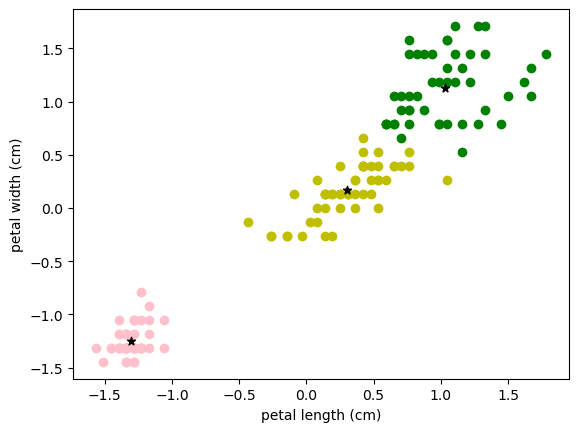

In [91]:
df['pred_scaled']=y_pred_scaled

df0=df[df.preds==0]
df1=df[df.preds==1]
df2=df[df.preds==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='pink')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='y')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [103]:
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,n_init=10)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

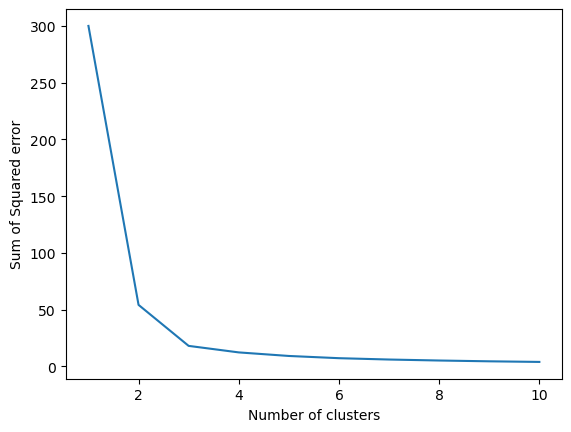

In [107]:
plt.ylabel('Sum of Squared error')
plt.xlabel('Number of clusters')
plt.plot(range(1,11),sse)
plt.show()